<a href="https://colab.research.google.com/github/1siddhi7/Learning-From-Data/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
!pip install qpsolvers

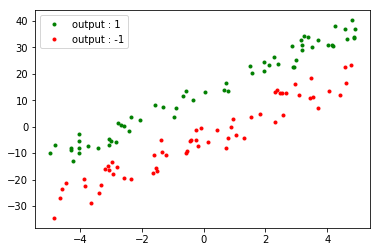

In [20]:
#Generating linearly separable dataset

x_l = np.random.uniform(-5,5,60)
y_l = 5*x_l + 3 + np.random.uniform(5,15,60)
xl = list(x_l)
yl = list(y_l)

x=[]
y=[]

data = []
for i in range(60):
  data.append([[1,xl[i],yl[i]],1])
  x.append([xl[i],yl[i]])
  y.append(yl[i])

x_r = np.random.uniform(-5,5,60)
y_r = 5*x_r + 3 - np.random.uniform(1,15,60)
xr = list(x_r)
yr = list(y_r)



for i in range(60):
  data.append([[1,xr[i],yr[i]],-1])
  x.append([xr[i],yr[i]])
  y.append(yr[i])
  
plt.plot(xl, yl, color='green', linewidth = 0, marker='o', markerfacecolor='green', markersize=3,label="output : 1")
plt.plot(xr, yr, color='red', linewidth = 0, marker='o', markerfacecolor='red', markersize=3,label="output : -1")
plt.legend()
plt.show()

random.shuffle(data)

In [21]:
#using 80% of the data for training
cut_point = int(len(data) * 0.8)
train_data=data[:cut_point]

#using remaining 20% of the data for testing
test_data=data[cut_point:]

def sign(x):
    if x>=0:
        return 1
    if x<0:
        return -1

#defining a function which returns 1 if there is
#even a single misclassified point in the predicted
#output and returns 0 if there is no misclassified point.
def misclassified(data,weights):
    flag=0
    for i in range(len(data)):
        x=np.array(data[i][0])
        y=data[i][1]
        if(sign(np.matmul(weights.T,x))!=y):
            flag=1
            break
    return flag

def perceptron(train_data):
  
  weights=np.array([0,0,0])  #initializing the weights vector

  error=[]
  iteration=0
  e=0

  for j in range(len(train_data)):
    x=np.array(train_data[j][0])
    yn=train_data[j][1]
    yn_predicted=sign(np.matmul(weights.T,x))
    e = e + (yn-yn_predicted)**2
  e=e**0.5  #the initial root mean square error with weights vector as 0 vector

  error.append([iteration,e])

  #training using pla; it surely converges for linearly separable data   
  while(misclassified(train_data,weights)):
    
    for i in range(len(train_data)):
        x=np.array(train_data[i][0])
        yn=train_data[i][1]
        flag=0
        if(sign(np.matmul(weights.T,x))!=yn):
            
            flag=1
            
            iteration=iteration+1
            
            weights=weights+yn*x

        if(flag==1):
            e=0
            for j in range(len(train_data)):
                x=np.array(train_data[j][0])
                yn=train_data[j][1]
                yn_predicted=sign(np.matmul(weights.T,x))
                e = e + (yn-yn_predicted)**2
            e=e**0.5      
            
            error.append([iteration,e])
        if(flag==1):
            break

  return weights
  
  
weights_perceptron = perceptron(train_data)
print(weights_perceptron)

[-34.         -65.54473338  13.18812694]


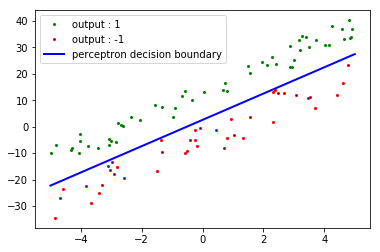

In [22]:
x_green = []
y_green = []
x_red = []
y_red = []
for i in range(len(train_data)):
    if(train_data[i][1]==1):
        x_green.append(train_data[i][0][1])
        y_green.append(train_data[i][0][2])
    elif (train_data[i][1]==-1):
        x_red.append(train_data[i][0][1])
        y_red.append(train_data[i][0][2])
        
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', markerfacecolor='blue', markersize=2,label="output : -1")

x_boundary = np.linspace(-5,5,2)
y_boundary = (-weights_perceptron[1]/weights_perceptron[2])*x_boundary +(-weights_perceptron[0]/weights_perceptron[2])

plt.plot(x_boundary, y_boundary, color='blue', linewidth = 2, marker='o', markerfacecolor='blue', markersize=0,label="perceptron decision boundary")

plt.legend()
plt.show()


In [23]:
from cvxopt import matrix, solvers

from qpsolvers import solve_qp

def svm(train_data):
  
  N = len(train_data)
  P = []

  for i in range(N):
    for j in range(N):
      P.append(train_data[j][1]*train_data[i][1]*(np.dot(train_data[j][0][1:],train_data[i][0][1:])))
    
  P = matrix(P,(N,N))

  q = np.ones((N,))*-1
  q = matrix(q)

  A = np.zeros((N,))

  for i in range(N):
    A[i]=(train_data[i][1])
  
  A = matrix(A,(1,N))


  b = [0.0]
  b = matrix(b)

  G = np.identity(N)*-1
  G = matrix(G)


  h = np.zeros((N,))
  h = matrix(h)

  alpha = solvers.qp(P, q, G, h, A, b)

  a = []
  for i in range(N):
    a.append(alpha['x'][i])

  weights = [0,0]

  for i in range(N):
    weights[0] += alpha['x'][i]*train_data[i][1]*train_data[i][0][1]
    weights[1] += alpha['x'][i]*train_data[i][1]*train_data[i][0][2]

  bias = (1/train_data[a.index(max(a))][1]) - (weights[0]*train_data[a.index(max(a))][0][1] + weights[1]*train_data[a.index(max(a))][0][2])
  
  return weights,bias


weights_svm,bias = svm(train_data)
print(weights_svm,bias)



[-1.5927976247045408, 0.3227439731703501] -1.6542676762325117


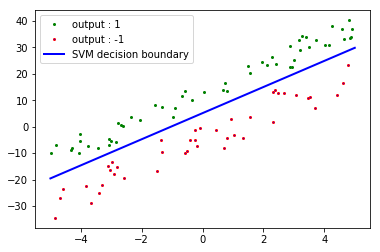

In [24]:

        
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', markerfacecolor='blue', markersize=2,label="output : -1")

x_boundary_svm = np.linspace(-5,5,2)
y_boundary_svm = (-weights_svm[0]/weights_svm[1])*x_boundary_svm +(-bias/weights_svm[1])

plt.plot(x_boundary_svm, y_boundary_svm, color='blue', linewidth = 2, marker='o', markerfacecolor='blue', markersize=0,label="SVM decision boundary")

plt.legend()
plt.show()

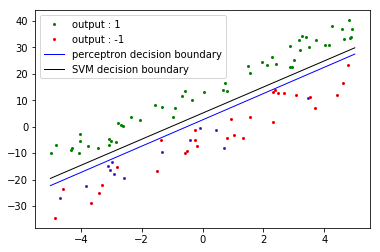

In [25]:
#Comparing perceptron and SVM decision boundary

plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', markerfacecolor='blue', markersize=2,label="output : -1")

plt.plot(x_boundary, y_boundary, color='blue', linewidth = 1, marker='o', markerfacecolor='blue', markersize=0,label="perceptron decision boundary")
plt.plot(x_boundary_svm, y_boundary_svm, color='black', linewidth = 1, marker='o', markerfacecolor='blue', markersize=0,label="SVM decision boundary")

plt.legend()
plt.show()

In [26]:
def error_perceptron(test_data, weights):
  
  e=0
  for i in range(len(test_data)):
    x = np.array(test_data[i][0])
    yn = train_data[i][1]
    yn_predicted = sign(np.matmul(weights.T,x))
    e = e + (yn-yn_predicted)**2
    
  return e**0.5


def error_svm(test_data, weights, bias):
  
  e=0
  for i in range(len(test_data)):
    
    x = np.array(test_data[i][0])
    yn = train_data[i][1]
    
    weights_s = np.array(weights)
    weights_s = np.concatenate(([bias],weights_svm))
    
    yn_predicted = sign(np.matmul(weights_s.T,x))
    e = e + (yn-yn_predicted)**2
    
  return e**0.5

print(error_perceptron(test_data, weights_perceptron), error_svm(test_data, weights_svm, bias))

6.6332495807108 6.6332495807108


6.928203230275509
6.928203230275509


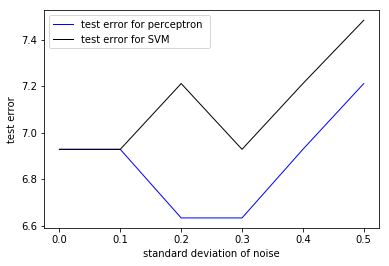

In [36]:
def add_noise(test_data, sd):
  
  ans = test_data.copy()
  noise = np.random.normal(0, sd, (len(test_data),2))
  
  for i in range(len(test_data)):
    
    ans[i][0][1] += noise[i][0]
    ans[i][0][2] += noise[i][1]
    
  return ans

e_perceptron = []
e_svm = []
sd = [i/10 for i in range(0,6)]

print(error_perceptron(add_noise(test_data,0), weights_perceptron))
print(error_svm(add_noise(test_data,0), weights_svm, bias))



for item in sd:
  
  noisy_data = add_noise(test_data, item)
  
  e_perceptron.append(error_perceptron(noisy_data, weights_perceptron))
  e_svm.append(error_svm(noisy_data, weights_svm, bias))
  
  


plt.plot(sd, e_perceptron, color='blue', linewidth = 1, marker='o', markerfacecolor='blue', markersize=0,label="test error for perceptron ")
plt.plot(sd, e_svm, color='black', linewidth = 1, marker='o', markerfacecolor='blue', markersize=0,label="test error for SVM")
plt.xlabel("standard deviation of noise")
plt.ylabel("test error")
plt.legend()
plt.show()
  
  
